In [1]:
import numpy as np
from numpy import random as rd
from matplotlib import rc
rc('text', usetex=True)
rc('figure', figsize=(12,8))
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
X = rd.randn(10000)

In [3]:
m = X.mean()
std = X.std()
m,std

(-0.0023375962126874123, 1.0031410407014203)

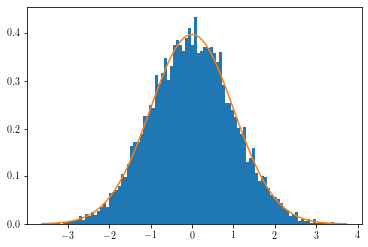

In [4]:
plt.hist(X, bins=100, density=True)
plt.plot(*(lambda x: (x, norm.pdf(x, loc=X.mean(), scale=X.std())))(np.linspace(X.min(), X.max(), 100)))
plt.show()

In [5]:
def norm_pdf(x: np.array, mu: float):
    return np.exp(-0.5 * np.power(x - mu, 2)) / (2 * np.pi)

def test_norm_pdf():
    x = np.linspace(-5,5,100)
    for mu in [-0.5,0,0.8]:
        plt.plot(x, norm_pdf(x, mu), label=f"mu={mu}")
    plt.legend()
    plt.show()
#test_norm_pdf()

max log likelihood is -249.84331641154137 for m = 3.0


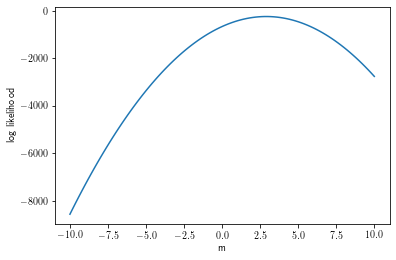

In [6]:
mu = 3.0
X = rd.normal(loc=mu, size=100)

N = 100
m_range = np.linspace(-10, 10, N+1)
log_likelihoods = [np.log(norm_pdf(X, m)).sum() for m in m_range]

plt.plot(m_range, log_likelihoods)
plt.xlabel("m")
plt.ylabel("log likelihood")

arg_max = np.argmax(log_likelihoods)
max_log_likelihoods = log_likelihoods[arg_max]
max_m = m_range[arg_max]

print(f"max log likelihood is {max_log_likelihoods} for m = {max_m}")

4.5500%


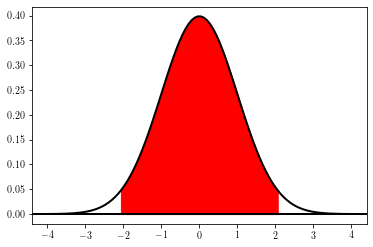

In [7]:
std = 1
n = 2
distrib = norm(scale=std)
print(f"{distrib.cdf(- n * std) * 2:.4%}")

x = np.linspace(-4, 4, 100)
y = distrib.pdf(x)
plt.axhline(y=0, color="black", lw=2)
plt.plot(x, y, color="black", lw=2)
plt.fill_between(x, y, color="red", where=y > distrib.cdf(- n * std)*2)
plt.show()